In [ ]:
#importing required libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

In [124]:
warnings.filterwarnings("ignore")

Reading Data

In [ ]:
#Loading data
leads_df= pd.read_csv('Leads.csv')
leads_df0= leads_df.copy()
leads_df0.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [ ]:
#Checking shape
leads_df0.shape

(9240, 37)

In [ ]:
#Checking dataframe info
leads_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
#Checking descriptive statistics
leads_df0.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [129]:
leads_df0['Lead Number'].nunique()

9240

In [ ]:
# Creating a function that prints claases and their proportions for all object columns in a dataframe
def print_classes(df, exclude_col=[]):
    object_columns= df.select_dtypes(include=['O']).columns.tolist()
    if len(exclude_col) > 0:
        object_columns= list(set(object_columns) - set(exclude_col))
    for column in object_columns:
        print('*'*100)
        print('Unique Values in column: ',column)
        print('*'*100)
        print(df[column].value_counts(normalize= True, dropna= False))

#Checking no. of unique values in every object columns of leads_df0
print_classes(leads_df0, ['Prospect ID','Lead Number'])

****************************************************************************************************
Unique Values in column:  Receive More Updates About Our Courses
****************************************************************************************************
Receive More Updates About Our Courses
No    1.0
Name: proportion, dtype: float64
****************************************************************************************************
Unique Values in column:  Asymmetrique Activity Index
****************************************************************************************************
Asymmetrique Activity Index
NaN          0.456494
02.Medium    0.415476
01.High      0.088853
03.Low       0.039177
Name: proportion, dtype: float64
****************************************************************************************************
Unique Values in column:  Magazine
****************************************************************************************************
Magazine


In [131]:
leads_df0.replace({'Select': np.nan}, inplace= True)
leads_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [132]:
leads_df0.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Checking columns having no variance, high missing value

In [133]:
one_unique= leads_df0.nunique()== 1
no_var_cols= one_unique[one_unique].index

In [134]:
leads_df0.drop(no_var_cols, axis=1, inplace=True)
leads_df0.shape

(9240, 32)

In [135]:
round(leads_df0.isna().sum() * 100/ leads_df0.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [136]:
high_missing_cols= ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
leads_df0.drop(high_missing_cols, axis=1, inplace=True)
leads_df0.shape

(9240, 25)

In [137]:
row_check= round(leads_df0.isna().sum(axis= 1) * 100/ leads_df0.shape[1], 2) > 70
row_check[row_check]

Series([], dtype: bool)

In [138]:
leads_df0['Lead Number']= leads_df0['Lead Number'].astype('object')

# Checking categorical columns having high no. of categories
Now, We'll check all categorical column and will perform re-grouping of the classes where required. We will also impute missing values using only Business Knowledge. Any column where Statistical imputation is required, we'll perform that after EDA and Train Test split.

In [139]:
print_classes(leads_df0, ['Prospect ID','Lead Number'])

****************************************************************************************************
Unique Values in column:  Specialization
****************************************************************************************************
Specialization
NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural 

In [140]:
leads_df0['Lead Origin']= leads_df0['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form' ],'Other')

leads_df0['Lead Origin'].value_counts(dropna= False)

Lead Origin
Landing Page Submission    4886
API                        3580
Other                       774
Name: count, dtype: int64

In [141]:
leads_df0['Lead Source']= leads_df0['Lead Source'].replace({'google':'Google'})

In [142]:
source_major_cats= ['Google', 'Direct Traffic','Olark Chat','Organic Search','Reference', np.nan]
leads_df0['Lead Source']= leads_df0['Lead Source'].map(lambda x: x if x in source_major_cats else 'Other Sources')

leads_df0['Lead Source'].value_counts(dropna= False)

Lead Source
Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other Sources      345
NaN                 36
Name: count, dtype: int64

In [143]:
positive_act= ['SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Link Clicked', 'Form Submitted on Website',
               'Approached upfront', 'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Modified']
neutral_act= ['Email Opened', 'Olark Chat Conversation', 'Had a Phone Conversation', 'Email Received']
neg_act= ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']

leads_df0['Last Activity']= leads_df0['Last Activity'].replace(positive_act, 'Positive Behaviour')
leads_df0['Last Activity']= leads_df0['Last Activity'].replace(neutral_act, 'Neutral',)
leads_df0['Last Activity']= leads_df0['Last Activity'].replace(neg_act, 'Negative Behaviour')

leads_df0['Last Activity'].value_counts(dropna= False)

Last Activity
Neutral               4442
Positive Behaviour    4213
Negative Behaviour     482
NaN                    103
Name: count, dtype: int64

In [144]:
leads_df0['Last Notable Activity']= leads_df0['Last Notable Activity'].replace(positive_act, 'Positive Behaviour')
leads_df0['Last Notable Activity']= leads_df0['Last Notable Activity'].replace(neutral_act, 'Neutral',)
leads_df0['Last Notable Activity']= leads_df0['Last Notable Activity'].replace(neg_act, 'Negative Behaviour')

leads_df0['Last Notable Activity'].value_counts()

Last Notable Activity
Positive Behaviour    6074
Neutral               3025
Negative Behaviour     141
Name: count, dtype: int64

In [145]:
leads_df0['Country']= leads_df0['Country'].map(lambda x: x if x in ['India', 'United States', np.nan] else 'Other Countries')

leads_df0['Country'].value_counts(dropna= False)

Country
India              6492
NaN                2461
Other Countries     218
United States        69
Name: count, dtype: int64

In [146]:
domain_sp= ['Banking, Investment And Insurance', 'Media and Advertising', 'Travel and Tourism', 'Healthcare Management',
            'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business']
management_sp= ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management',
                'IT Projects Management', 'Supply Chain Management']
business_sp= ['Business Administration', 'International Business', 'Services Excellence']

leads_df0['Specialization']= leads_df0['Specialization'].replace(domain_sp, 'Domain Specialization')
leads_df0['Specialization']= leads_df0['Specialization'].replace(management_sp, 'Management Specialization')
leads_df0['Specialization']= leads_df0['Specialization'].replace(business_sp, 'Domain Business Specialization')
leads_df0['Specialization'].fillna('Not Disclosed', inplace= True)

leads_df0['Specialization'].value_counts(dropna= False)

Specialization
Management Specialization         3880
Not Disclosed                     3380
Domain Specialization             1359
Domain Business Specialization     621
Name: count, dtype: int64

In [147]:
leads_df0['What is your current occupation'].fillna('Not Disclosed', inplace= True)
leads_df0['What is your current occupation']= leads_df0['What is your current occupation'].replace(['Housewife','Businessman'], 'Other')
leads_df0['What is your current occupation'].value_counts(dropna= False)

What is your current occupation
Unemployed              5600
Not Disclosed           2690
Working Professional     706
Student                  210
Other                     34
Name: count, dtype: int64

In [148]:
leads_df0.rename(columns={'What is your current occupation': 'Occupation'}, inplace= True)
leads_df0.rename(columns={'What matters most to you in choosing a course': 'Reason_choosing'}, inplace= True)

<Figure size 2000x2000 with 0 Axes>

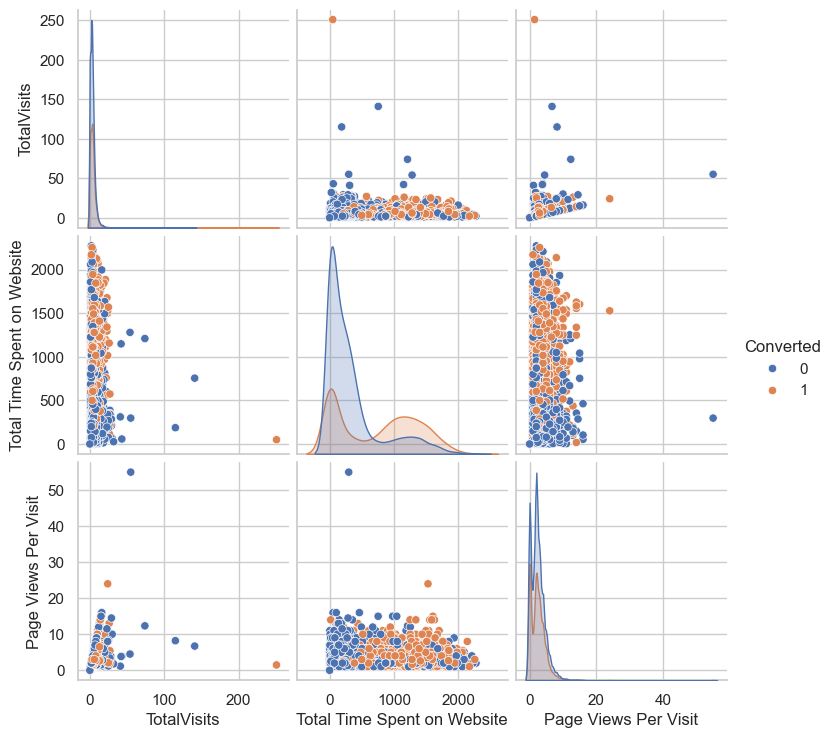

In [149]:
plt.figure(figsize=[20,20])
sns.pairplot(leads_df0.select_dtypes(include= ['int64','float64']), hue='Converted', diag_kind= 'kde')
plt.show()

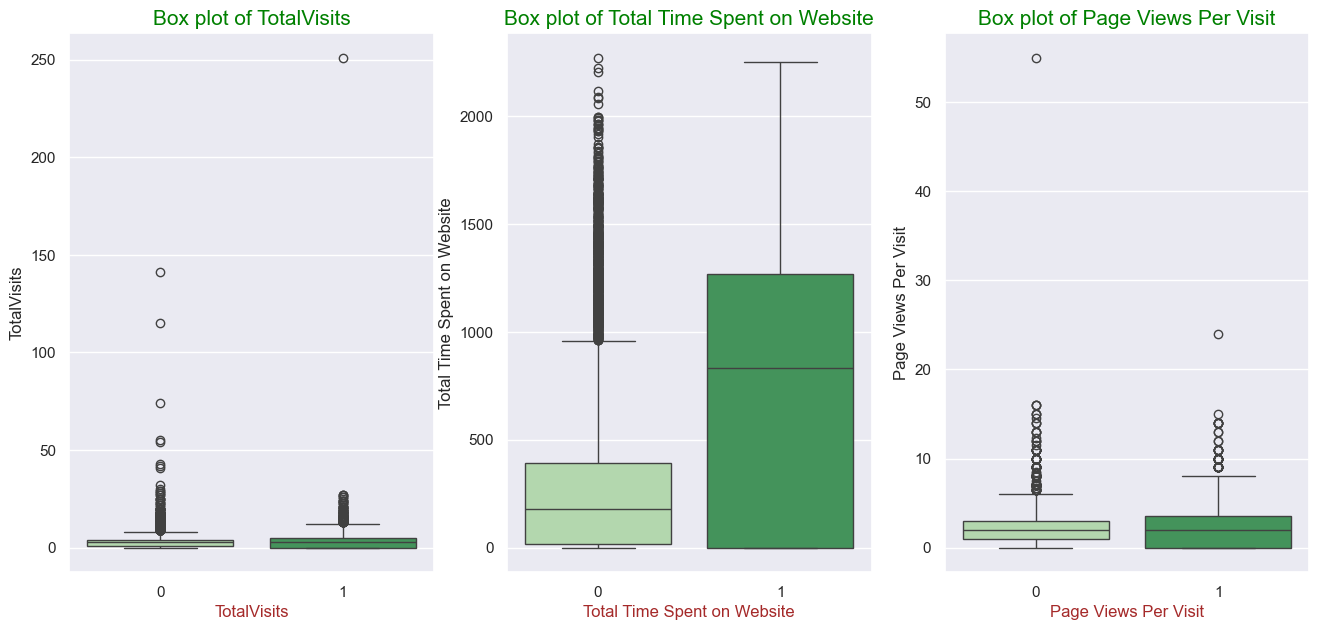

In [150]:
cols_to_check= ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

sns.set(font_scale = 1)
plt.figure(figsize=[16,7])

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(1,3,i)
    title_text= f'Box plot of {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= leads_df0, y= col, x= 'Converted', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 15, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})

# Removing Outliers

In [151]:
leads_df0['Page Views Per Visit'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([ 0.,  0.,  2.,  3.,  5.,  6.,  9., 55.])

In [152]:
leads_df0= leads_df0[~(leads_df0['Page Views Per Visit'] > 9)]

In [153]:
leads_df0['TotalVisits'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([  0.  ,   0.  ,   3.  ,   5.  ,   7.  ,   9.  ,  16.73, 251.  ])

In [154]:
leads_df0= leads_df0[~(leads_df0['TotalVisits'] > 16.93)]

In [155]:
leads_df0['Total Time Spent on Website'].quantile([.01,.05,.5,.75,.9,.95,.99,1]).values

array([   0.  ,    0.  ,  246.  ,  930.  , 1378.  , 1558.35, 1840.27,
       2272.  ])

In [156]:
leads_df0= leads_df0[~(leads_df0['Total Time Spent on Website'] > 1840.27)]

In [157]:
print('% of observation dropped as outlier:', 100 - (leads_df0.shape[0] * 100/ 9240))

% of observation dropped as outlier: 2.7813852813852833


# Visualizing Categorical Variables

In [158]:
cat_cols= ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Last Activity', 'Country',
       'Specialization', 'Occupation',
       'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity', 'Tags']

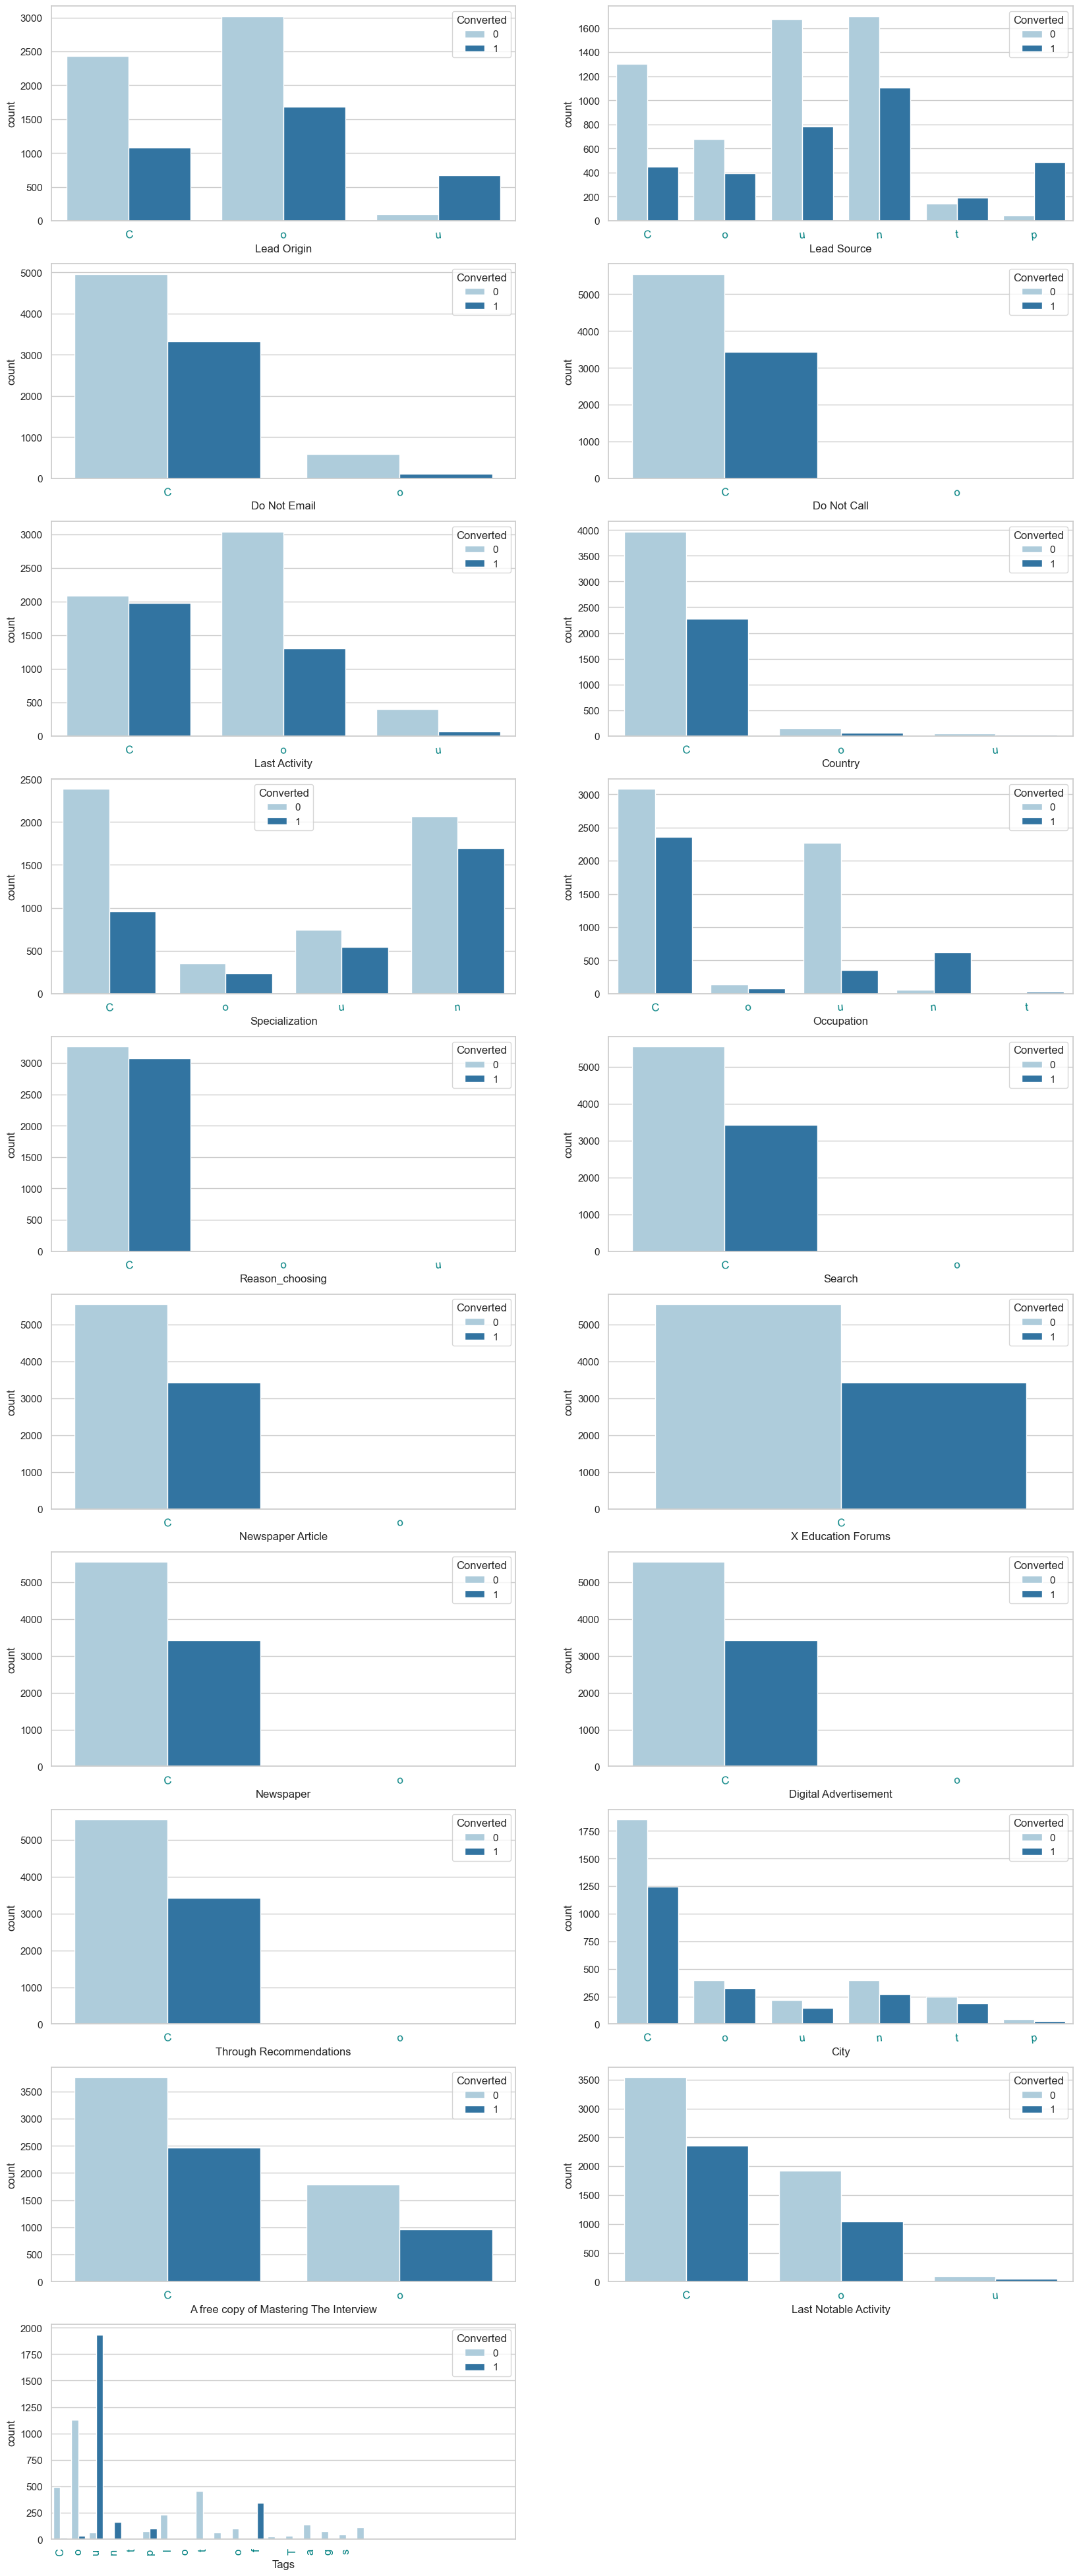

In [159]:
sns.set_style("whitegrid")
sns.color_palette("husl", 8)
plt.figure(figsize= [20,55])
for i, cat_col in enumerate(cat_cols, 1):
    title_text= f'Countplot of {cat_col}'
    ax= plt.subplot(11, 2,i)
    if cat_col== 'Tags':
        ax.set_xticklabels(title_text, rotation = 90, fontdict= {'fontsize': 12, 'color': 'Teal'})
    else:
        ax.set_xticklabels(title_text, rotation = 5, fontdict= {'fontsize': 12, 'color': 'Teal'})
    x_label= f'{cat_col}'
    sns.countplot(data= leads_df0, x= cat_col, hue= 'Converted', palette= 'Paired', ax=ax)

# Data Preparation

In [160]:
leads_df1= leads_df0.copy()
leads_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Positive Behaviour
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Ringing,NaN,No,Neutral
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Neutral
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Ringing,Mumbai,No,Positive Behaviour
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Positive Behaviour


In [161]:
leads_df1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'Occupation', 'Reason_choosing', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [162]:
leads_df1.drop(['Last Activity','Last Notable Activity','Tags', 'Prospect ID', 'Lead Number'], axis= 1, inplace= True)
leads_df1.shape

(8983, 20)

In [163]:
y= leads_df1.pop('Converted')
X= leads_df1
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .3, random_state= 100)

In [164]:
X_train.shape

(6288, 19)

In [165]:
y_train.shape

(6288,)

# Missing Value Imputation

In [166]:
leads_df1.isna().sum()

Lead Origin                                  0
Lead Source                                 35
Do Not Email                                 0
Do Not Call                                  0
TotalVisits                                133
Total Time Spent on Website                  0
Page Views Per Visit                       133
Country                                   2454
Specialization                               0
Occupation                                   0
Reason_choosing                           2648
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
City                                      3624
A free copy of Mastering The Interview       0
dtype: int64

In [167]:
lead_source_imputer= X_train['Lead Source'].mode()[0]
X_train['Lead Source'].fillna(lead_source_imputer, inplace= True)
X_test['Lead Source'].fillna(lead_source_imputer, inplace= True)

In [168]:
country_imputer= X_train['Country'].mode()[0]
X_train.Country.fillna(country_imputer, inplace= True)
X_test.Country.fillna(country_imputer, inplace= True)

In [169]:
reason_imputer= X_train['Reason_choosing'].mode()[0]
X_train['Reason_choosing'].fillna(reason_imputer, inplace= True)
X_test['Reason_choosing'].fillna(reason_imputer, inplace= True)

In [170]:
city_imputer= X_train['City'].mode()[0]
X_train.City.fillna(city_imputer, inplace= True)
X_test.City.fillna(city_imputer, inplace= True)

In [171]:
total_visit_imputer= X_train['TotalVisits'].median()
X_train.TotalVisits.fillna(total_visit_imputer, inplace= True)
X_test.TotalVisits.fillna(total_visit_imputer, inplace= True)

In [172]:
pageview_imputer= X_train['Page Views Per Visit'].median()
X_train['Page Views Per Visit'].fillna(pageview_imputer, inplace= True)
X_test['Page Views Per Visit'].fillna(pageview_imputer, inplace= True)

In [173]:
X_train.isna().any()

Lead Origin                               False
Lead Source                               False
Do Not Email                              False
Do Not Call                               False
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Country                                   False
Specialization                            False
Occupation                                False
Reason_choosing                           False
Search                                    False
Newspaper Article                         False
X Education Forums                        False
Newspaper                                 False
Digital Advertisement                     False
Through Recommendations                   False
City                                      False
A free copy of Mastering The Interview    False
dtype: bool

In [174]:
X_test.isna().any()

Lead Origin                               False
Lead Source                               False
Do Not Email                              False
Do Not Call                               False
TotalVisits                               False
Total Time Spent on Website               False
Page Views Per Visit                      False
Country                                   False
Specialization                            False
Occupation                                False
Reason_choosing                           False
Search                                    False
Newspaper Article                         False
X Education Forums                        False
Newspaper                                 False
Digital Advertisement                     False
Through Recommendations                   False
City                                      False
A free copy of Mastering The Interview    False
dtype: bool

# Encoding Categorical Variables

In [175]:
binary_class_cols= ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

X_test[binary_class_cols]= X_test[binary_class_cols].replace({'No': 0, 'Yes': 1})
X_train[binary_class_cols]= X_train[binary_class_cols].replace({'No': 0, 'Yes': 1})

In [176]:
multi_cat_cols= ['Lead Origin','Lead Source','Country', 'Specialization', 'Reason_choosing', 'Occupation', 'City']

dummy_train= pd.get_dummies(X_train[multi_cat_cols], drop_first= True)
dummy_test= pd.get_dummies(X_test[multi_cat_cols], drop_first= True)

In [177]:
X_train= X_train.merge(dummy_train, how= 'inner', left_index= True, right_index= True)
X_train.drop(multi_cat_cols, axis=1, inplace= True)
X_train.shape

(6288, 34)

In [178]:
X_test= X_test.merge(dummy_test, how= 'inner', left_index= True, right_index= True)
X_test.drop(multi_cat_cols, axis=1, inplace= True)
X_test.shape

(2695, 34)

# Performing MinMax Scaling on Train Data

In [179]:
cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler= MinMaxScaler()
X_train[cols]= scaler.fit_transform(X_train[cols])
X_train[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7584,0.1875,0.231104,0.166667
671,0.0625,0.266993,0.111111
1676,0.6250,0.615008,0.555556
2161,0.3125,0.939641,0.555556
6976,0.0000,0.000000,0.000000


# Performing Variance Thresholding

In [180]:
var_t= VarianceThreshold(threshold= .001)
variance_thresh= var_t.fit(X_train)
col_ind= var_t.get_support()

In [181]:
X_train.loc[:, ~col_ind].columns

Index(['Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Reason_choosing_Flexibility & Convenience'],
      dtype='object')

In [182]:
X_train= X_train.loc[:, col_ind]
X_test= X_test.loc[:, col_ind]

In [183]:
X_train.shape

(6288, 27)

In [184]:
X_test.shape

(2695, 27)

# Checking pairwise correlation

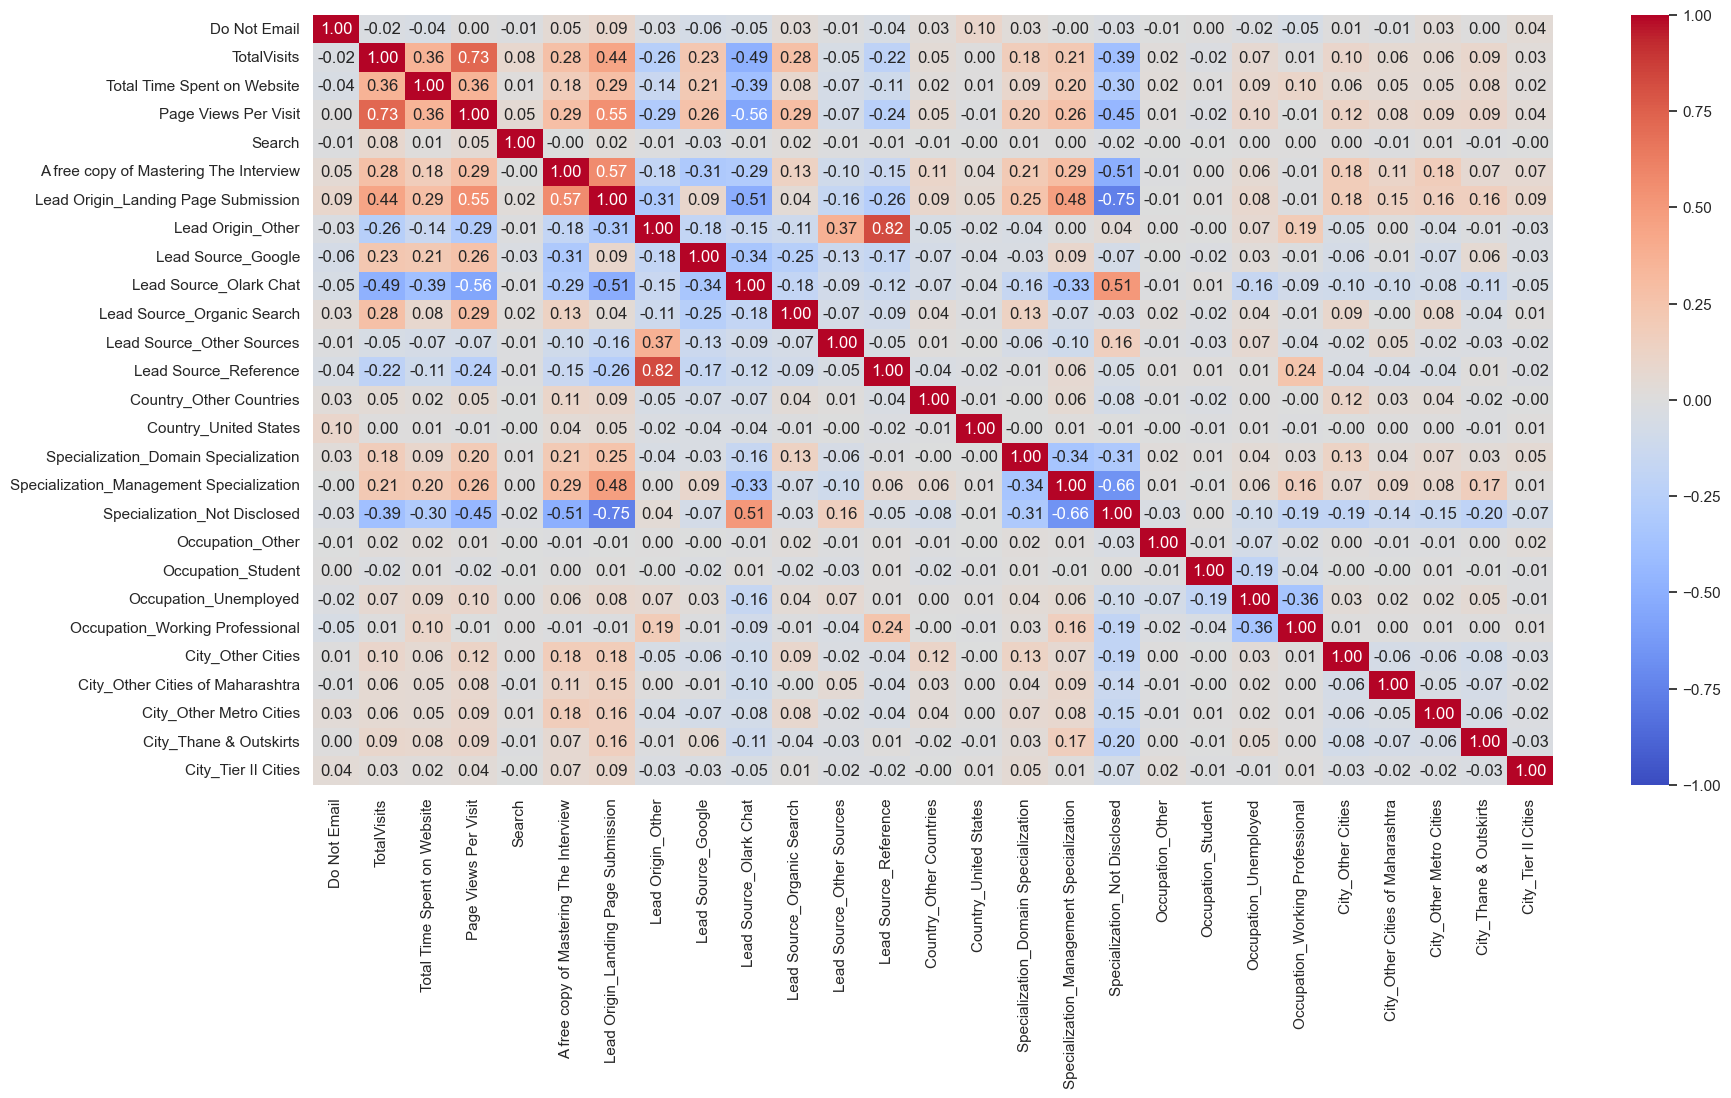

In [185]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

In [186]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Country_Other Countries',
       'Country_United States', 'Specialization_Domain Specialization',
       'Specialization_Management Specialization',
       'Specialization_Not Disclosed', 'Occupation_Other',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object')

In [187]:
X_train.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis= 1, inplace= True)
X_test.drop(['Lead Source_Reference','Specialization_Not Disclosed'], axis= 1, inplace= True)

# Model Building

In [188]:
# Creating a fitted model
lreg= LogisticRegression()
lreg.fit(X_train, y_train)
rfe = RFE(lreg, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [189]:
all_features= np.array(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
all_features

array([['Do Not Email', 'True', '1'],
       ['TotalVisits', 'True', '1'],
       ['Total Time Spent on Website', 'True', '1'],
       ['Page Views Per Visit', 'True', '1'],
       ['Search', 'False', '9'],
       ['A free copy of Mastering The Interview', 'False', '6'],
       ['Lead Origin_Landing Page Submission', 'True', '1'],
       ['Lead Origin_Other', 'True', '1'],
       ['Lead Source_Google', 'False', '3'],
       ['Lead Source_Olark Chat', 'True', '1'],
       ['Lead Source_Organic Search', 'False', '8'],
       ['Lead Source_Other Sources', 'True', '1'],
       ['Country_Other Countries', 'True', '1'],
       ['Country_United States', 'False', '2'],
       ['Specialization_Domain Specialization', 'True', '1'],
       ['Specialization_Management Specialization', 'True', '1'],
       ['Occupation_Other', 'True', '1'],
       ['Occupation_Student', 'True', '1'],
       ['Occupation_Unemployed', 'True', '1'],
       ['Occupation_Working Professional', 'True', '1'],
       ['Cit

In [190]:
top_16_features= list(all_features[all_features[:,1]=='True'][:,0])
top_16_features

[np.str_('Do Not Email'),
 np.str_('TotalVisits'),
 np.str_('Total Time Spent on Website'),
 np.str_('Page Views Per Visit'),
 np.str_('Lead Origin_Landing Page Submission'),
 np.str_('Lead Origin_Other'),
 np.str_('Lead Source_Olark Chat'),
 np.str_('Lead Source_Other Sources'),
 np.str_('Country_Other Countries'),
 np.str_('Specialization_Domain Specialization'),
 np.str_('Specialization_Management Specialization'),
 np.str_('Occupation_Other'),
 np.str_('Occupation_Student'),
 np.str_('Occupation_Unemployed'),
 np.str_('Occupation_Working Professional'),
 np.str_('City_Tier II Cities')]

In [191]:
X_train_final= X_train[top_16_features]
X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Tier II Cities
7584,0,0.1875,0.231104,0.166667,False,False,False,False,False,False,False,False,False,False,False,False
671,0,0.0625,0.266993,0.111111,False,False,False,False,False,False,False,False,False,True,False,False
1676,0,0.6250,0.615008,0.555556,True,False,False,False,False,False,True,False,False,True,False,False
2161,0,0.3125,0.939641,0.555556,True,False,False,False,False,False,True,False,False,True,False,False
6976,0,0.0000,0.000000,0.000000,False,False,True,False,False,False,False,False,False,True,False,False


In [192]:
print(y_train.dtypes)
print(X_train_final.dtypes)
X_train_final = X_train_final.astype({col: 'int' for col in X_train_final.select_dtypes(include='bool').columns})

X_train_final = X_train_final.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')
X_train_final = X_train_final.fillna(0)

X_train_final = pd.get_dummies(X_train_final, drop_first=True)
print(X_train_final.shape)
print(y_train.shape)
lreg1 = sm.GLM(y_train, X_train_final, family=sm.families.Binomial())
lreg_model_1= lreg1.fit()

int64
Do Not Email                                  int64
TotalVisits                                 float64
Total Time Spent on Website                 float64
Page Views Per Visit                        float64
Lead Origin_Landing Page Submission            bool
Lead Origin_Other                              bool
Lead Source_Olark Chat                         bool
Lead Source_Other Sources                      bool
Country_Other Countries                        bool
Specialization_Domain Specialization           bool
Specialization_Management Specialization       bool
Occupation_Other                               bool
Occupation_Student                             bool
Occupation_Unemployed                          bool
Occupation_Working Professional                bool
City_Tier II Cities                            bool
dtype: object
(6288, 16)
(6288,)


In [ ]:
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3182.2
Date:                Tue, 19 Nov 2024   Deviance:                       6364.4
Time:                        00:29:10   Pearson chi2:                 6.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2718
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [194]:

def vif_calculation(X_df):
    if 'const' not in X_df.columns:
        X_df = sm.add_constant(X_df)
    vif = pd.DataFrame()
    X = X_df.drop('const', axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values('VIF', ascending=False)


In [195]:
vif_calculation(X_train_final)

,Features,VIF
3,Page Views Per Visit,6.06
4,Lead Origin_Landing Page Submission,5.04
1,TotalVisits,4.78
10,Specialization_Management Specialization,3.68
13,Occupation_Unemployed,2.82
2,Total Time Spent on Website,2.20
9,Specialization_Domain Specialization,1.92
5,Lead Origin_Other,1.66
14,Occupation_Working Professional,1.43
7,Lead Source_Other Sources,1.25


In [196]:
def get_metrics(X_train_final, lreg_model):
    y_train_pred= pd.DataFrame(lreg_model.predict(X_train_final), columns=['prob'])
    y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0)
    y_train_pred= y_train_pred.merge(y_train, how= 'inner', left_index= True, right_index= True)
    tn,fp,fn,tp= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()
    print('Confusion Matrix:')
    print('True Negative:',tn, '    ','False Positive:',fp)
    print('False Negative:',fn,'    ','True Positive:',tp, '\n')
    print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

In [197]:
get_metrics(X_train_final, lreg_model= lreg_model_1)

Confusion Matrix:
True Negative: 3248      False Positive: 643
False Negative: 878      True Positive: 1519 

Overall model accuracy: 0.7581106870229007


# Building 2nd Model

In [198]:

# Removing 'City_Tier II Cities' from predictor
X_train_final.drop('City_Tier II Cities', axis= 1, inplace= True)

# Checking X_train_final
X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Country_Other Countries,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,0,0.1875,0.231104,0.166667,0,0,0,0,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0.111111,0,0,0,0,0,0,0,0,0,1,0
1676,0,0.6250,0.615008,0.555556,1,0,0,0,0,0,1,0,0,1,0
2161,0,0.3125,0.939641,0.555556,1,0,0,0,0,0,1,0,0,1,0
6976,0,0.0000,0.000000,0.000000,0,0,1,0,0,0,0,0,0,1,0


In [199]:

lreg2= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_2= lreg2.fit()

print(lreg_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3182.4
Date:                Tue, 19 Nov 2024   Deviance:                       6364.9
Time:                        00:29:10   Pearson chi2:                 6.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2717
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [200]:
vif_calculation(X_train_final)

,Features,VIF
3,Page Views Per Visit,6.06
4,Lead Origin_Landing Page Submission,5.01
1,TotalVisits,4.78
10,Specialization_Management Specialization,3.68
13,Occupation_Unemployed,2.82
2,Total Time Spent on Website,2.20
9,Specialization_Domain Specialization,1.92
5,Lead Origin_Other,1.66
14,Occupation_Working Professional,1.43
7,Lead Source_Other Sources,1.25


In [201]:
get_metrics(X_train_final, lreg_model= lreg_model_2)

Confusion Matrix:
True Negative: 3250      False Positive: 641
False Negative: 876      True Positive: 1521 

Overall model accuracy: 0.7587468193384224


# Building 3rd Model

In [202]:
X_train_final.drop('Country_Other Countries', axis= 1, inplace= True)

X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,0,0.1875,0.231104,0.166667,0,0,0,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0.111111,0,0,0,0,0,0,0,0,1,0
1676,0,0.6250,0.615008,0.555556,1,0,0,0,0,1,0,0,1,0
2161,0,0.3125,0.939641,0.555556,1,0,0,0,0,1,0,0,1,0
6976,0,0.0000,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0


In [203]:
lreg3= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_3= lreg3.fit()

print(lreg_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3187.2
Date:                Tue, 19 Nov 2024   Deviance:                       6374.4
Time:                        00:29:10   Pearson chi2:                 6.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2706
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [204]:
vif_calculation(X_train_final)

,Features,VIF
3,Page Views Per Visit,6.06
4,Lead Origin_Landing Page Submission,5.00
1,TotalVisits,4.78
9,Specialization_Management Specialization,3.68
12,Occupation_Unemployed,2.82
2,Total Time Spent on Website,2.20
8,Specialization_Domain Specialization,1.92
5,Lead Origin_Other,1.66
13,Occupation_Working Professional,1.43
7,Lead Source_Other Sources,1.25


In [205]:
get_metrics(X_train_final, lreg_model= lreg_model_3)

Confusion Matrix:
True Negative: 3249      False Positive: 642
False Negative: 879      True Positive: 1518 

Overall model accuracy: 0.7581106870229007


# Building 4th model

In [206]:
X_train_final.drop('Page Views Per Visit' , axis= 1, inplace= True)

X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,0,0.1875,0.231104,0,0,0,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0,0,0,0,0,0,0,0,1,0
1676,0,0.6250,0.615008,1,0,0,0,0,1,0,0,1,0
2161,0,0.3125,0.939641,1,0,0,0,0,1,0,0,1,0
6976,0,0.0000,0.000000,0,0,1,0,0,0,0,0,1,0


In [207]:
lreg4= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_4= lreg4.fit()

print(lreg_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3256.9
Date:                Tue, 19 Nov 2024   Deviance:                       6513.7
Time:                        00:29:10   Pearson chi2:                 6.92e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2543
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [208]:
vif_calculation(X_train_final)

,Features,VIF
3,Lead Origin_Landing Page Submission,4.69
8,Specialization_Management Specialization,3.67
1,TotalVisits,2.87
11,Occupation_Unemployed,2.74
2,Total Time Spent on Website,2.18
7,Specialization_Domain Specialization,1.92
4,Lead Origin_Other,1.64
12,Occupation_Working Professional,1.43
6,Lead Source_Other Sources,1.24
5,Lead Source_Olark Chat,1.20


In [209]:
get_metrics(X_train_final, lreg_model= lreg_model_4)

Confusion Matrix:
True Negative: 3149      False Positive: 742
False Negative: 877      True Positive: 1520 

Overall model accuracy: 0.7425254452926209


# Building 5th model

In [210]:
X_train_final.drop('Lead Origin_Landing Page Submission' , axis= 1, inplace= True)

X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Domain Specialization,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,0,0.1875,0.231104,0,0,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0,0,0,0,0,0,0,1,0
1676,0,0.6250,0.615008,0,0,0,0,1,0,0,1,0
2161,0,0.3125,0.939641,0,0,0,0,1,0,0,1,0
6976,0,0.0000,0.000000,0,1,0,0,0,0,0,1,0


In [211]:
lreg5= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_5= lreg5.fit()

print(lreg_model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3375.9
Date:                Tue, 19 Nov 2024   Deviance:                       6751.9
Time:                        00:29:10   Pearson chi2:                 6.77e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2255
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [212]:
vif_calculation(X_train_final)

,Features,VIF
1,TotalVisits,2.70
10,Occupation_Unemployed,2.68
7,Specialization_Management Specialization,2.27
2,Total Time Spent on Website,2.16
3,Lead Origin_Other,1.50
6,Specialization_Domain Specialization,1.46
11,Occupation_Working Professional,1.42
5,Lead Source_Other Sources,1.24
4,Lead Source_Olark Chat,1.17
0,Do Not Email,1.06


In [213]:
get_metrics(X_train_final, lreg_model= lreg_model_5)

Confusion Matrix:
True Negative: 3222      False Positive: 669
False Negative: 900      True Positive: 1497 

Overall model accuracy: 0.7504770992366412


# Building 6th model

In [214]:
X_train_final.drop('Specialization_Domain Specialization' , axis= 1, inplace= True)

X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Specialization_Management Specialization,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,0,0.1875,0.231104,0,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0,0,0,0,0,0,1,0
1676,0,0.6250,0.615008,0,0,0,1,0,0,1,0
2161,0,0.3125,0.939641,0,0,0,1,0,0,1,0
6976,0,0.0000,0.000000,0,1,0,0,0,0,1,0


In [215]:
lreg6= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_6= lreg6.fit()

print(lreg_model_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3395.5
Date:                Tue, 19 Nov 2024   Deviance:                       6790.9
Time:                        00:29:10   Pearson chi2:                 6.84e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2207
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [216]:
vif_calculation(X_train_final)

,Features,VIF
9,Occupation_Unemployed,2.55
1,TotalVisits,2.48
2,Total Time Spent on Website,2.15
6,Specialization_Management Specialization,1.88
3,Lead Origin_Other,1.49
10,Occupation_Working Professional,1.39
5,Lead Source_Other Sources,1.23
4,Lead Source_Olark Chat,1.16
0,Do Not Email,1.06
8,Occupation_Student,1.06


In [217]:
get_metrics(X_train_final, lreg_model= lreg_model_6)

Confusion Matrix:
True Negative: 3232      False Positive: 659
False Negative: 904      True Positive: 1493 

Overall model accuracy: 0.7514312977099237


# Building 7th model

In [218]:
X_train_final.drop('Specialization_Management Specialization' , axis= 1, inplace= True)

X_train_final.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7584,0,0.1875,0.231104,0,0,0,0,0,0,0
671,0,0.0625,0.266993,0,0,0,0,0,1,0
1676,0,0.6250,0.615008,0,0,0,0,0,1,0
2161,0,0.3125,0.939641,0,0,0,0,0,1,0
6976,0,0.0000,0.000000,0,1,0,0,0,1,0


In [219]:
lreg7= sm.GLM(y_train, X_train_final, family= sm.families.Binomial())
lreg_model_7 = sm.GLM(y_train, X_train_final, family=sm.families.Binomial()).fit()

print(lreg_model_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6288
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3426.5
Date:                Tue, 19 Nov 2024   Deviance:                       6853.0
Time:                        00:29:10   Pearson chi2:                 6.85e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2129
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Do Not Ema

In [220]:
vif_calculation(X_train_final)

,Features,VIF
8,Occupation_Unemployed,2.39
1,TotalVisits,2.34
2,Total Time Spent on Website,2.11
3,Lead Origin_Other,1.49
9,Occupation_Working Professional,1.32
5,Lead Source_Other Sources,1.22
4,Lead Source_Olark Chat,1.16
0,Do Not Email,1.05
7,Occupation_Student,1.05
6,Occupation_Other,1.01


In [221]:
get_metrics(X_train_final, lreg_model= lreg_model_7)

Confusion Matrix:
True Negative: 3272      False Positive: 619
False Negative: 887      True Positive: 1510 

Overall model accuracy: 0.7604961832061069


# Calculating other Model Evaluation metrics

In [222]:
y_train_pred= pd.DataFrame(lreg_model_7.predict(X_train_final), columns=['prob'])
y_train_pred['pred_Converted'] = y_train_pred.prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred= y_train_pred.merge(y_train, how= 'inner', left_index= True, right_index= True)
TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted).ravel()

In [223]:
print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_Converted))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))

print('Positive Predictive Value: ',TP / float(TP+FP))

print('Positive Predictive Value: ',TN / float(TN+ FN))

Overall model accuracy: 0.7604961832061069
Sensitivity / Recall:  0.6299541093032958
Specificity:  0.8409149318941146
False Positive Rate:  0.15908506810588538
Positive Predictive Value:  0.7092531705025834
Positive Predictive Value:  0.7867275787448906


In [224]:
def roc_plot(actual, probs):
    fpr, tpr, thresholds= roc_curve(actual, probs, drop_intermediate = False )
    auc_score= roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

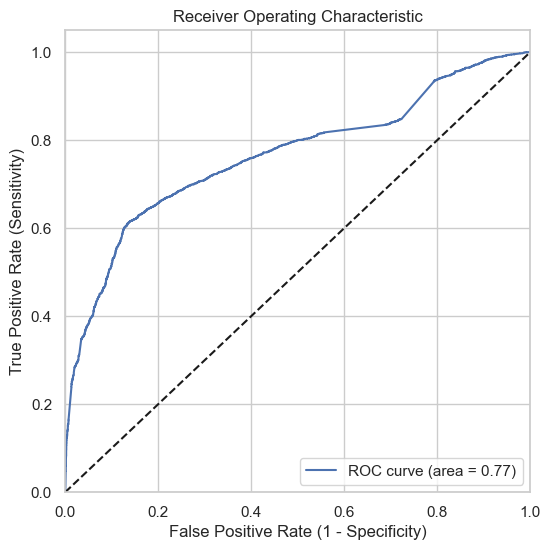

In [225]:
fpr, tpr, thresholds= roc_curve(y_train_pred.Converted, y_train_pred.prob, drop_intermediate = False )
roc_plot(y_train_pred.Converted, y_train_pred.prob)

# Finding Optimal Probability Cutoff Point
### Using Sensitivity-Specificity

In [226]:
num= [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred[i]=  y_train_pred.prob.map(lambda x: 1 if x > i else 0)
y_train_pred.head()

,prob,pred_Converted,Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7584,0.468397,0,0,1,1,1,1,1,0,0,0,0,0
671,0.556858,1,1,1,1,1,1,1,1,0,0,0,0
1676,0.280117,0,1,1,1,1,0,0,0,0,0,0,0
2161,0.710189,1,1,1,1,1,1,1,1,1,1,0,0
6976,0.237640,0,0,1,1,1,0,0,0,0,0,0,0


In [227]:
plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]

plot_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.381202,1.000000,0.000000
0.1,0.1,0.422233,0.988319,0.073503
0.2,0.2,0.463899,0.952441,0.162940
0.3,0.3,0.606870,0.803087,0.485993
0.4,0.4,0.697360,0.720901,0.682858
0.5,0.5,0.760496,0.629954,0.840915
0.6,0.6,0.757156,0.532332,0.895657
0.7,0.7,0.739981,0.418857,0.937805
0.8,0.8,0.714536,0.285357,0.978926
0.9,0.9,0.673823,0.155194,0.993318


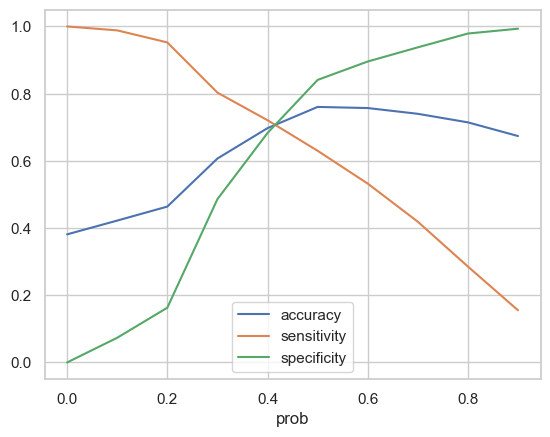

In [228]:
plot_df.plot.line(x= 'prob', y= ['accuracy','sensitivity','specificity'])
plt.show()

In [229]:
y_train_pred['pred_final']= y_train_pred.prob.map(lambda x: 1 if x > .32 else 0)

In [230]:
print('Model Evaluation Metrics on Train dataset')
print('#'* 50)

TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')


print('Overall model accuracy:', accuracy_score(y_true= y_train_pred.Converted, y_pred= y_train_pred.pred_final))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))

print('Positive Predictive Value: ',TP / float(TP+FP))

print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Train dataset
##################################################
Confusion Matrix:
True Negative: 2042      False Positive: 1849
False Negative: 501      True Positive: 1896 

Overall model accuracy: 0.6262722646310432
Sensitivity / Recall:  0.7909887359198998
Specificity:  0.5248008224106914
False Positive Rate:  0.4751991775893087
Positive Predictive Value:  0.5062750333778371
Positive Predictive Value:  0.8029885961462839


In [231]:
y_train_pred= y_train_pred.merge(leads_df['Lead Number'], how= 'left', left_index= True, right_index= True)

y_train_pred['Lead Score']= y_train_pred.prob * 100
y_train_pred= y_train_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_train_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
2656,634047,1,1,0.997795,99.779495
3478,627106,1,1,0.997700,99.769958
6383,600952,1,1,0.997621,99.762093
5921,604411,1,1,0.996650,99.664997
7579,591536,1,1,0.996531,99.653124
6751,598055,1,1,0.996336,99.633613
7211,594089,1,1,0.995963,99.596274
8081,588013,1,1,0.995799,99.579920
9015,581257,1,1,0.995563,99.556311
120,659283,1,1,0.995290,99.529046


## Evaluating final model on test data

In [232]:
cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[cols]= scaler.transform(X_test[cols])
X_test[cols].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7464,0.0000,0.000000,0.000000
987,0.0625,0.443176,0.111111
6975,0.1250,0.077760,0.222222
3406,0.0000,0.000000,0.000000
4500,0.0000,0.000000,0.000000


In [233]:
test_cols = [col for col in X_train_final.columns if col != 'const']

X_test = X_test[test_cols]

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,0,0.0000,0.000000,False,True,False,False,False,False,False
987,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,0,0.0000,0.000000,False,True,False,False,False,False,False


In [ ]:
X_test_final= sm.add_constant(X_test)
X_test_final.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Other,Lead Source_Olark Chat,Lead Source_Other Sources,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
7464,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False
987,1.0,0,0.0625,0.443176,False,False,True,False,False,False,False
6975,1.0,1,0.1250,0.077760,False,False,False,False,False,True,False
3406,1.0,0,0.0000,0.000000,True,False,True,False,False,True,False
4500,1.0,0,0.0000,0.000000,False,True,False,False,False,False,False


In [235]:
X_test_final = X_test_final[X_train_final.columns]

In [ ]:
X_test_final = X_test_final.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test_final = X_test_final.astype({col: 'int' for col in X_test_final.select_dtypes(include='bool').columns})
y_test_pred= pd.DataFrame(lreg_model_7.predict(X_test_final), columns=['prob'])
y_test_pred.head()

,prob
7464,0.268890
987,0.490900
6975,0.096107
3406,0.767835
4500,0.268890


# Generating Lead Score on Test dataset

In [242]:
y_test_pred= y_test_pred.merge(y_test, how= 'inner', left_index= True, right_index= True)

In [243]:
y_test_pred['pred_Converted']= y_test_pred.prob.map(lambda x: 1 if x> .32 else 0)
y_test_pred.head()

,prob,Converted,pred_Converted
7464,0.268890,0,0
987,0.490900,0,1
6975,0.096107,0,0
3406,0.767835,1,1
4500,0.268890,0,0


In [244]:
y_test_pred= y_test_pred.merge(leads_df['Lead Number'], how= 'left', left_index= True, right_index= True)

In [245]:
y_test_pred['Lead Score']= y_test_pred.prob * 100
y_test_pred= y_test_pred[['Lead Number', 'Converted', 'pred_Converted', 'prob','Lead Score']].sort_values(
    'Lead Score', ascending= False)
y_test_pred.head(10)

,Lead Number,Converted,pred_Converted,prob,Lead Score
8074,588037,1,1,0.997591,99.759112
3428,627462,1,1,0.996899,99.689865
7187,594369,1,1,0.996225,99.622488
8063,588075,1,1,0.995825,99.582523
4613,615524,1,1,0.994379,99.437907
2984,631268,1,1,0.994071,99.407100
8057,588097,0,1,0.992265,99.226470
79,659710,1,1,0.992207,99.220701
4782,614077,1,1,0.990280,99.028011
5784,605335,1,1,0.990280,99.028011


# Evaluating final model on test data

In [246]:
print('Model Evaluation Metrics on Test dataset')
print('#'* 50)

TN,FP,FN,TP= confusion_matrix(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted).ravel()
print('Confusion Matrix:')
print('True Negative:',TN, '    ','False Positive:',FP)
print('False Negative:',FN,'    ','True Positive:',TP, '\n')

print('Overall model accuracy:', accuracy_score(y_true= y_test_pred.Converted, y_pred= y_test_pred.pred_Converted))

print('Sensitivity / Recall: ',TP / float(TP+FN))

print('Specificity: ', TN / float(TN+FP))

print('False Positive Rate: ',FP/ float(TN+FP))

print('Positive Predictive Value: ',TP / float(TP+FP))

print('Positive Predictive Value: ',TN / float(TN+ FN))

Model Evaluation Metrics on Test dataset
##################################################
Confusion Matrix:
True Negative: 896      False Positive: 764
False Negative: 237      True Positive: 798 

Overall model accuracy: 0.6285714285714286
Sensitivity / Recall:  0.7710144927536232
Specificity:  0.5397590361445783
False Positive Rate:  0.4602409638554217
Positive Predictive Value:  0.5108834827144686
Positive Predictive Value:  0.7908208296557812
